## import and cte

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from IPython.core.debugger import set_trace


In [7]:
def F(X,t,α,γ,q,η):
    x,y,z = X[0],X[1],X[2] # ou bien x,y = X
    return α*y, -γ*(x+z)-q*y, η*(y+1-np.exp(-x))

temps = np.linspace(0,10000,100000)
sol = odeint(F,[0.6,0.45,-0.35], temps,args=(α,γ,q,η))


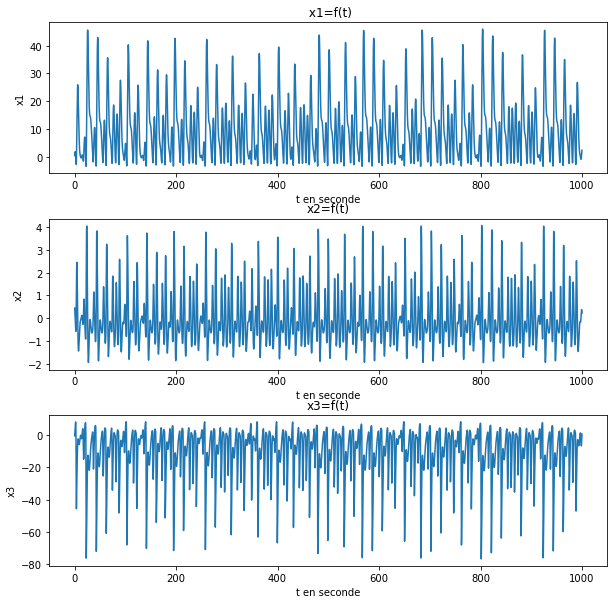

In [17]:
from scipy.integrate import odeint
α = 6.2723; γ = 0.0797; q = 0.6898; η = 6.2723
t = np.linspace(0,1000,10000000)
sol = odeint(F,[0.6,0.45,-0.35], t,args=(α,γ,q,η))
X1=sol[:,0]
X2=sol[:,1]
X3=sol[:,2]
W0=1 # mettre le w0 calculé
t=t/W0
plt.subplots(figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.subplot(3, 1, 1) # (rows, columns, panel number)
plt.title(" x1=f(t)")
plt.ylabel("x1")
plt.xlabel("t en seconde")
plt.plot(t,X1)
plt.subplot(3, 1, 2)
plt.title("x2=f(t)")
plt.ylabel("x2")
plt.xlabel("t en seconde")
plt.plot(t,X2)
plt.subplot(3, 1, 3)
plt.title("x3=f(t)")
plt.ylabel("x3")
plt.xlabel("t en seconde")
plt.plot(t,X3)
plt.show()

In [12]:
# Vcc=9.9 #V
# R1=47 #Ohm
# I0=5*10**-3 #A
# L=10**-3
# R2=10**3
# C1=470*10**-9
# C2= 470*10**-9
# Vt=27*10**(-3) #mV
# w0=np.sqrt((C1+C2)/(L*C1*C2))
# k=C2/(C1+C2)

# W0=np.sqrt((C1+C2)/(L*C1*C2))
# alpha=I0/(W0*C2*Vt)
# gamma=Vt/(W0*L)
# qq=R1/(L*W0)
# eta=alpha*C2/C1

# 1/W0,alpha,gamma,qq,eta

In [14]:
# α = alpha; γ = gamma; q = qq; η=eta
# α,γ,q,η

## plot x1 x2 x3

In [18]:
# #%matplotlib notebook
# Vcc=9.9 #V
# R1=47 #Ohm
# I0=5*10**-3 #A
# L=10**-3
# R2=10**3
# C1=470*10**-9
# C2= 470*10**-9
# Vt=27*10**(-3) #mV
# Vc = np.arange(8, 10, 0.1)#delta α of 0.1
# print(Vc)
# for v in Vc:
    
#     alpha=I0/(W0*C2*Vt)
#     W0=np.sqrt((C1+C2)/(L*C1*C2))
#     alpha=I0/(W0*C2*Vt)
#     gamma=Vt/(W0*L)
#     qq=R1/(L*W0)
#     eta=alpha*C2/C1
#     α = alpha
#     γ = gamma
#     q = qq
#     η=eta
#     print("α=",α,"γ=",γ,"q=",q,"η=",η)
#     t = np.linspace(0,10000,1000000)
#     sol = odeint(F,[0.6,0.45,-0.35], t,args=(α,γ,q,η))
#     X1=sol[:,0]
#     X2=sol[:,1]
#     X3=sol[:,2]
#     t=t/W0
#     plt.subplots(figsize=(10,10))
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
#     plt.subplot(3, 1, 1) # (rows, columns, panel number)
#     plt.title(" x1=f(t)")
#     plt.ylabel("x1")
#     plt.xlabel("t en seconde")
#     plt.plot(t,X1)
#     plt.subplot(3, 1, 2) 
#     plt.title("x2=f(t)")
#     plt.ylabel("x2")
#     plt.xlabel("t en seconde")
#     plt.plot(t,X2)
#     plt.subplot(3, 1, 3) 
#     plt.title("x3=f(t)")
#     plt.ylabel("x3")
#     plt.xlabel("t en seconde")
#     plt.plot(t,X3)
#     plt.show()

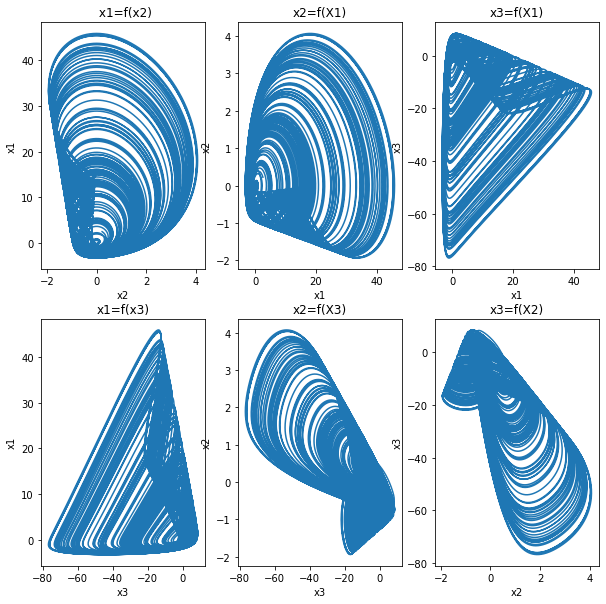

In [19]:
plt.subplots(figsize=(10,10))
plt.subplot(2, 3, 1) # (rows, columns, panel number)
plt.title(" x1=f(x2)")
plt.ylabel("x1")
plt.xlabel("x2")
plt.plot(X2,X1)
plt.subplot(2, 3, 4) 
plt.title("x1=f(x3)")
plt.ylabel("x1")
plt.xlabel("x3")
plt.plot(X3,X1)
plt.subplot(2, 3, 2) 
plt.title("x2=f(X1)")
plt.ylabel("x2")
plt.xlabel("x1")
plt.plot(X1,X2,)
plt.subplot(2, 3, 5) 
plt.title("x2=f(X3)")
plt.ylabel("x2")
plt.xlabel("x3")
plt.plot(X3,X2)
plt.subplot(2, 3, 3) 
plt.title("x3=f(X1)")
plt.ylabel("x3")
plt.xlabel("x1")
plt.plot(X1,X3)
plt.subplot(2, 3, 6) 
plt.title("x3=f(X2)")
plt.ylabel("x3")
plt.xlabel("x2")
plt.plot(X2,X3)


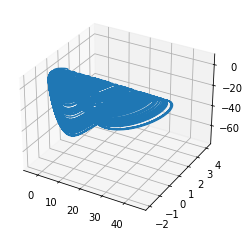

In [20]:
#%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(xs=X1, ys=X2, zs=X3,zdir='z')
plt.show()

## lyapunov fail (need some fix)

In [8]:
#%matplotlib notebook
def lyapunov(delta,tmax):
    d=0
    X1=[]
    X2=[]
    X3=[]
    temps = np.linspace(0,tmax,10000)
    sol1 = odeint(F,[0.6,0.45,-0.35], temps,args=(α,γ,q,η))
    X1=sol1[:,0]
    X2=sol1[:,1]
    X3=sol1[:,2]
    
    sol2 = odeint(F,[0.6+delta,0.45+delta,delta-0.35], temps,args=(α,γ,q,η))
    X1b=sol2[:,0]
    X2b=sol2[:,1]
    X3b=sol2[:,2]
#     plt.subplot(2, 1, 1) # (rows, columns, panel number)
#     plt.title(" x1=f(t)")
#     plt.plot(temps,X1)
#     plt.subplot(2, 1, 2) 
#     plt.title("x1b=f(t)")
#     plt.plot(temps2,X1b)
    d=(((X1-X1b)**2+(X2-X2b)**2+(X3-X3b)**2)**(1/2))/delta
    #plt.plot(temps,d)
    #plt.show()
    return (np.sum(np.log(d)))/len(temps)#temps[-1]
lyap=lyapunov(0.1,100)
print(lyap)


4.677274102537238


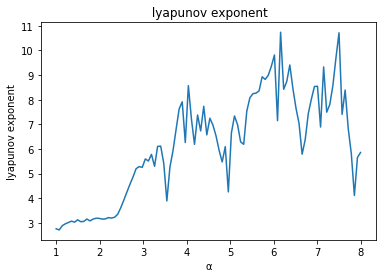

In [9]:
# α = 6.27; γ = 0.07; q = 0.68; η = 6.27
#%matplotlib notebook

def plot_lyap():
    global α
    lyap=[]
    valeurs=np.linspace(1,8,100)
    for val in valeurs:
        α= val
        lyap.append(lyapunov(10**-6,100))
    assert(len(valeurs)==len(lyap))
    plt.plot(valeurs,lyap)
    plt.title(" lyapunov exponent")
    plt.xlabel("α")
    plt.ylabel("lyapunov exponent")
    plt.show()

plot_lyap()


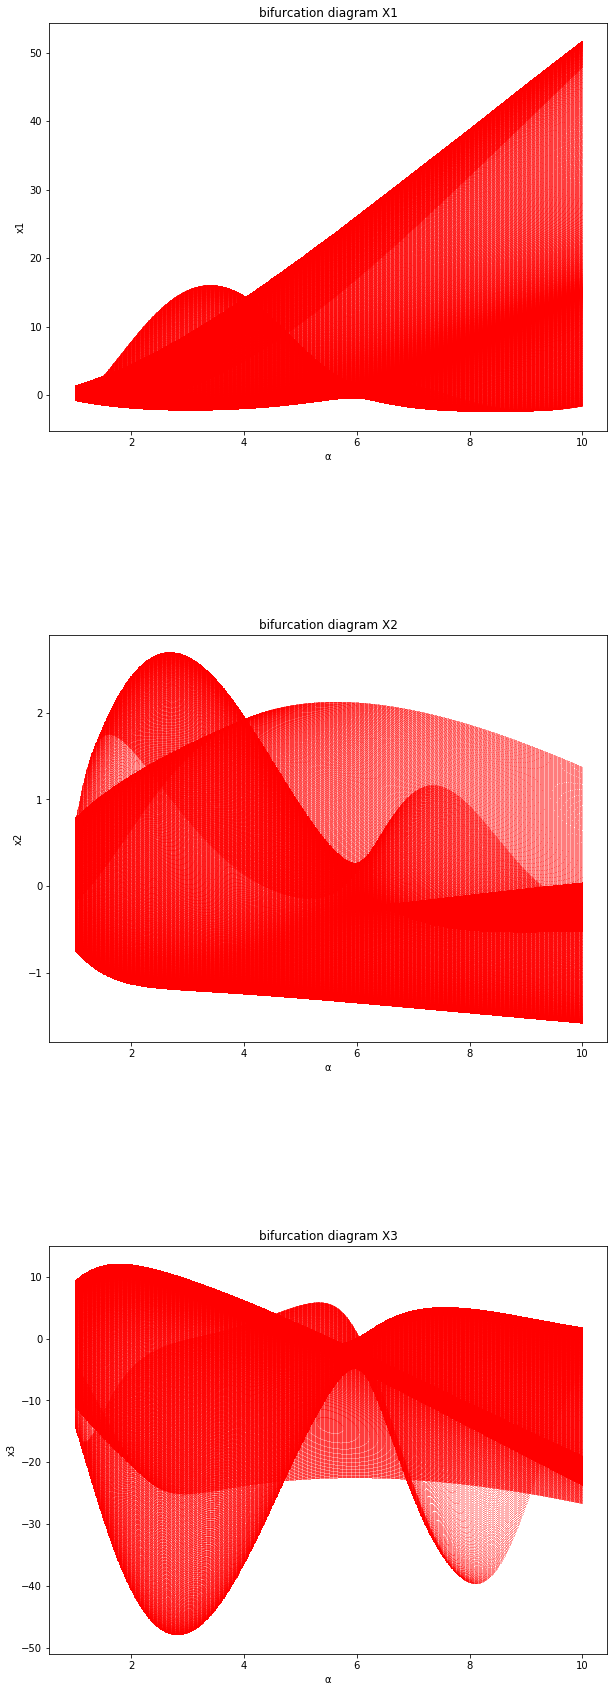

In [10]:
#avec la dérivé
#α*y, -γ*(x+z)-q*y, η*(y+1-np.exp(-x))
α = 6.27; γ = 0.07; q = 0.68; η = 6.27
#%matplotlib notebook

plt.subplots(figsize=(10,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

#exponant lyapunov for X1 X2 and X3
lyap1=[];lyap2=[];lyap3=[]

#bifurcation diagram for x1,x2,x3
mapsx1 = np.array([])
mapsx2 = np.array([])
mapsx3 = np.array([])

# Hyper parameters
numbers_points=10**5 # precision of solution, delta_t between every point : tmax/numbers_points
tmax=100 # time max (in second)

#pas=tmax/numbers_points

pas=1
index_min=1000 # try != values
index_max=index_min+2000

αmin=1; αmax=10

αvalues = np.arange(αmin, αmax, 0.01)#delta α of 0.1

incr=0
for i in tqdm(αvalues):
    α = i; γ = 0.07; q = 0.68; η = 6.27
    incr+=1
    temps = np.linspace(0,500, 100000)#temps = np.linspace(0,tmax,numbers_points) #calculate with 10000 point 
    sol1 = odeint(F,[0.6,0.45,-0.35], temps,args=(α,γ,q,η))#solve equation
    X1=sol1[:,0]
    X2=sol1[:,1]
    X3=sol1[:,2]
#     if incr%100==1 :
#         print("α=",i)
#         plt.plot(temps,X1)
#         plt.show()
    #bifurcation diagram
    mapsx1=np.append(mapsx1,X1[index_min:index_max:pas])
    mapsx2=np.append(mapsx2,X2[index_min:index_max:pas])
    mapsx3=np.append(mapsx3,X3[index_min:index_max:pas])

    #calcul dXi/dt
    dX1=α*X2
    dX2=-γ*(X1+X3)-q*X2
    dX3=η*(X2+1-np.exp(-X1))
    #calcul lyapunov exponent 
    lyap1.append(np.mean(np.log(abs(dX1))))
    lyap2.append(np.mean(np.log(abs(dX2))))
    lyap3.append(np.mean(np.log(abs(dX3))))
xticks =[i for i in αvalues for a in range(round((index_max-index_min)/pas))]
#= np.linspace(αmin, αmax, len(mapsx1))

plt.subplot(3,1,1)
plt.title("bifurcation diagram X1")
plt.xlabel("α")
plt.ylabel("x1")
plt.plot(xticks, mapsx1, 'r,',alpha = 0.3, label = 'Map')


plt.subplot(3,1,2)
plt.plot(xticks, mapsx2, 'r,',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X2")

plt.xlabel("α")
plt.ylabel("x2")


plt.subplot(3,1,3)
plt.plot(xticks, mapsx3, 'r,',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X3")

plt.xlabel("α")

plt.ylabel("x3")
plt.show()




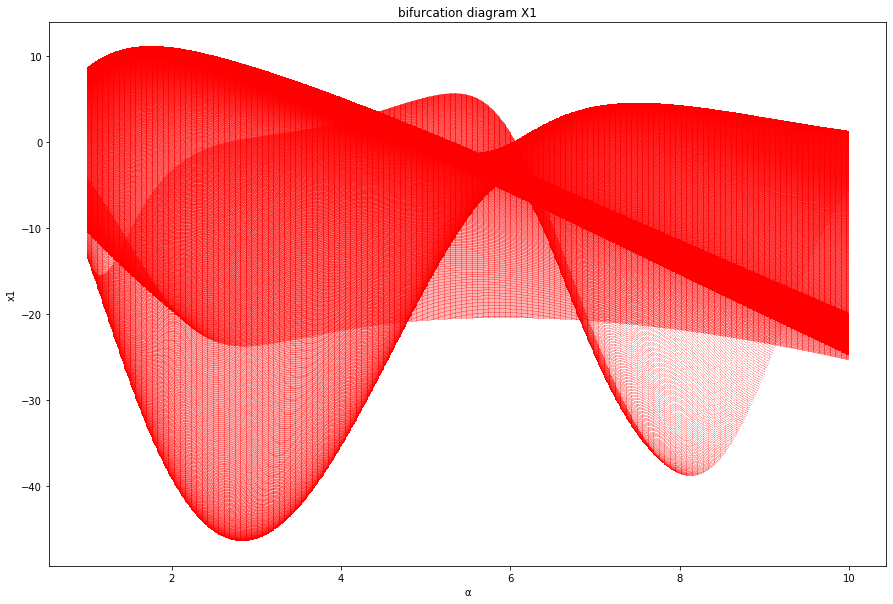

In [11]:
#%matplotlib notebook
plt.subplots(figsize=(15,10))
plt.subplot(1,1,1)
plt.title("bifurcation diagram X1")
plt.xlabel("α")
plt.ylabel("x1")
plt.plot((xticks), (mapsx3+mapsx2),'r,',alpha = 0.3, label = 'Map')

## bifurcation diagram

prendre que les point ou la dérivé est nulle

In [118]:
def derive(X,temps):
    #set_trace()
    pas_t=temps[1]-temps[2]
    derivee=(X[1:-1]-X[0:len(X)-2])/pas_t
    derivee=np.append(derivee,[(X[-1]-X[len(X)-2])/pas_t])
    derivee=np.append(derivee,[(X[-1]-X[len(X)-2])/pas_t])
    #assert len(derivee)!=len(X),"pb"
    return(derivee)

def find_slope_eq0(X,temps):
    derivee=derive(X,temps)
    slope_0=abs(derivee)<0.15
    #assert(len(slope_0)!=len(X))
    return temps[slope_0],X[slope_0]

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [30:08<00:00,  4.42it/s]


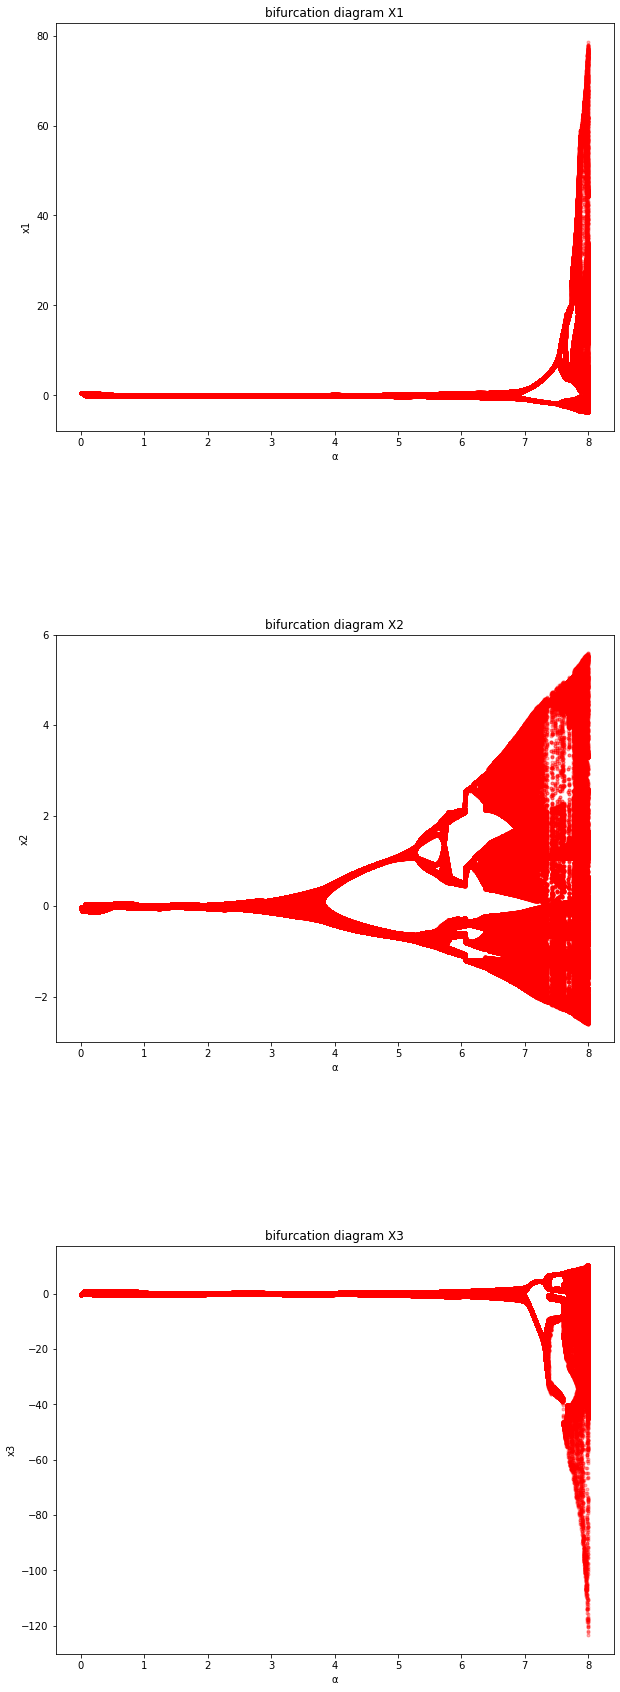

In [120]:
#avec la dérivé
#α*y, -γ*(x+z)-q*y, η*(y+1-np.exp(-x))
α = 6.27; γ = 0.07; q = 0.68; η = 6.27
#%matplotlib notebook

#exponant lyapunov for X1 X2 and X3
lyap1=[];lyap2=[];lyap3=[]

#bifurcation diagram for x1,x2,x3
mapsx1 = np.array([])
mapsx2 = np.array([])
mapsx3 = np.array([])

# Hyper parameters
numbers_points=10**4 # precision of solution, delta_t between every point : tmax/numbers_points
tmax=500 # time max (in second)
temps = np.linspace(0,tmax,numbers_points) #calculate with 10000 point 
#pas=tmax/numbers_points

pas=1
index_min=1000 # try != values
index_max=-1

αmin=0; αmax=8

αvalues = np.arange(αmin, αmax, 0.001)#delta α of 0.1

incr=0
for i in tqdm(αvalues):
    #set_trace()
    α = i; γ = 0.07; q = 0.68; η = i # α = η car C1=C2
    incr+=1
    
    sol1 = odeint(F,[0.6,0.45,-0.35], temps,args=(α,γ,q,η))#solve equation
    X1=sol1[:,0]
    X2=sol1[:,1]
    X3=sol1[:,2]
#     if incr%100==1 :
#         print("α=",i)
#         plt.plot(temps,X1)
#         plt.show()
        
    #bifurcation diagram
    t1,y1=find_slope_eq0(X1[index_min:index_max],temps[index_min:index_max])
    t2,y2=find_slope_eq0(X2[index_min:index_max],temps[index_min:index_max])
    t3,y3=find_slope_eq0(X3[index_min:index_max],temps[index_min:index_max])
    
    mapsx1=np.append(mapsx1,y1)
    mapsx2=np.append(mapsx2,y2)
    mapsx3=np.append(mapsx3,y3)
    


#xticks =[i for i in αvalues for a in range(round((index_max-index_min)/pas))]
xticks= np.linspace(αmin, αmax, len(mapsx1))
plt.subplots(figsize=(10,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.subplot(3,1,1)
plt.title("bifurcation diagram X1")
plt.xlabel("α")
plt.ylabel("x1")
plt.plot(xticks, mapsx1, 'r.',alpha = 0.3, label = 'Map')#'r,'


plt.subplot(3,1,2)
xticks= np.linspace(αmin, αmax, len(mapsx2))

plt.plot(xticks, mapsx2, 'r.',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X2")

plt.xlabel("α")
plt.ylabel("x2")

xticks= np.linspace(αmin, αmax, len(mapsx3))

plt.subplot(3,1,3)
plt.plot(xticks, mapsx3, 'r.',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X3")

plt.xlabel("α")

plt.ylabel("x3")
plt.show()

In [142]:
xticks[5000000]

3.0672833133039736

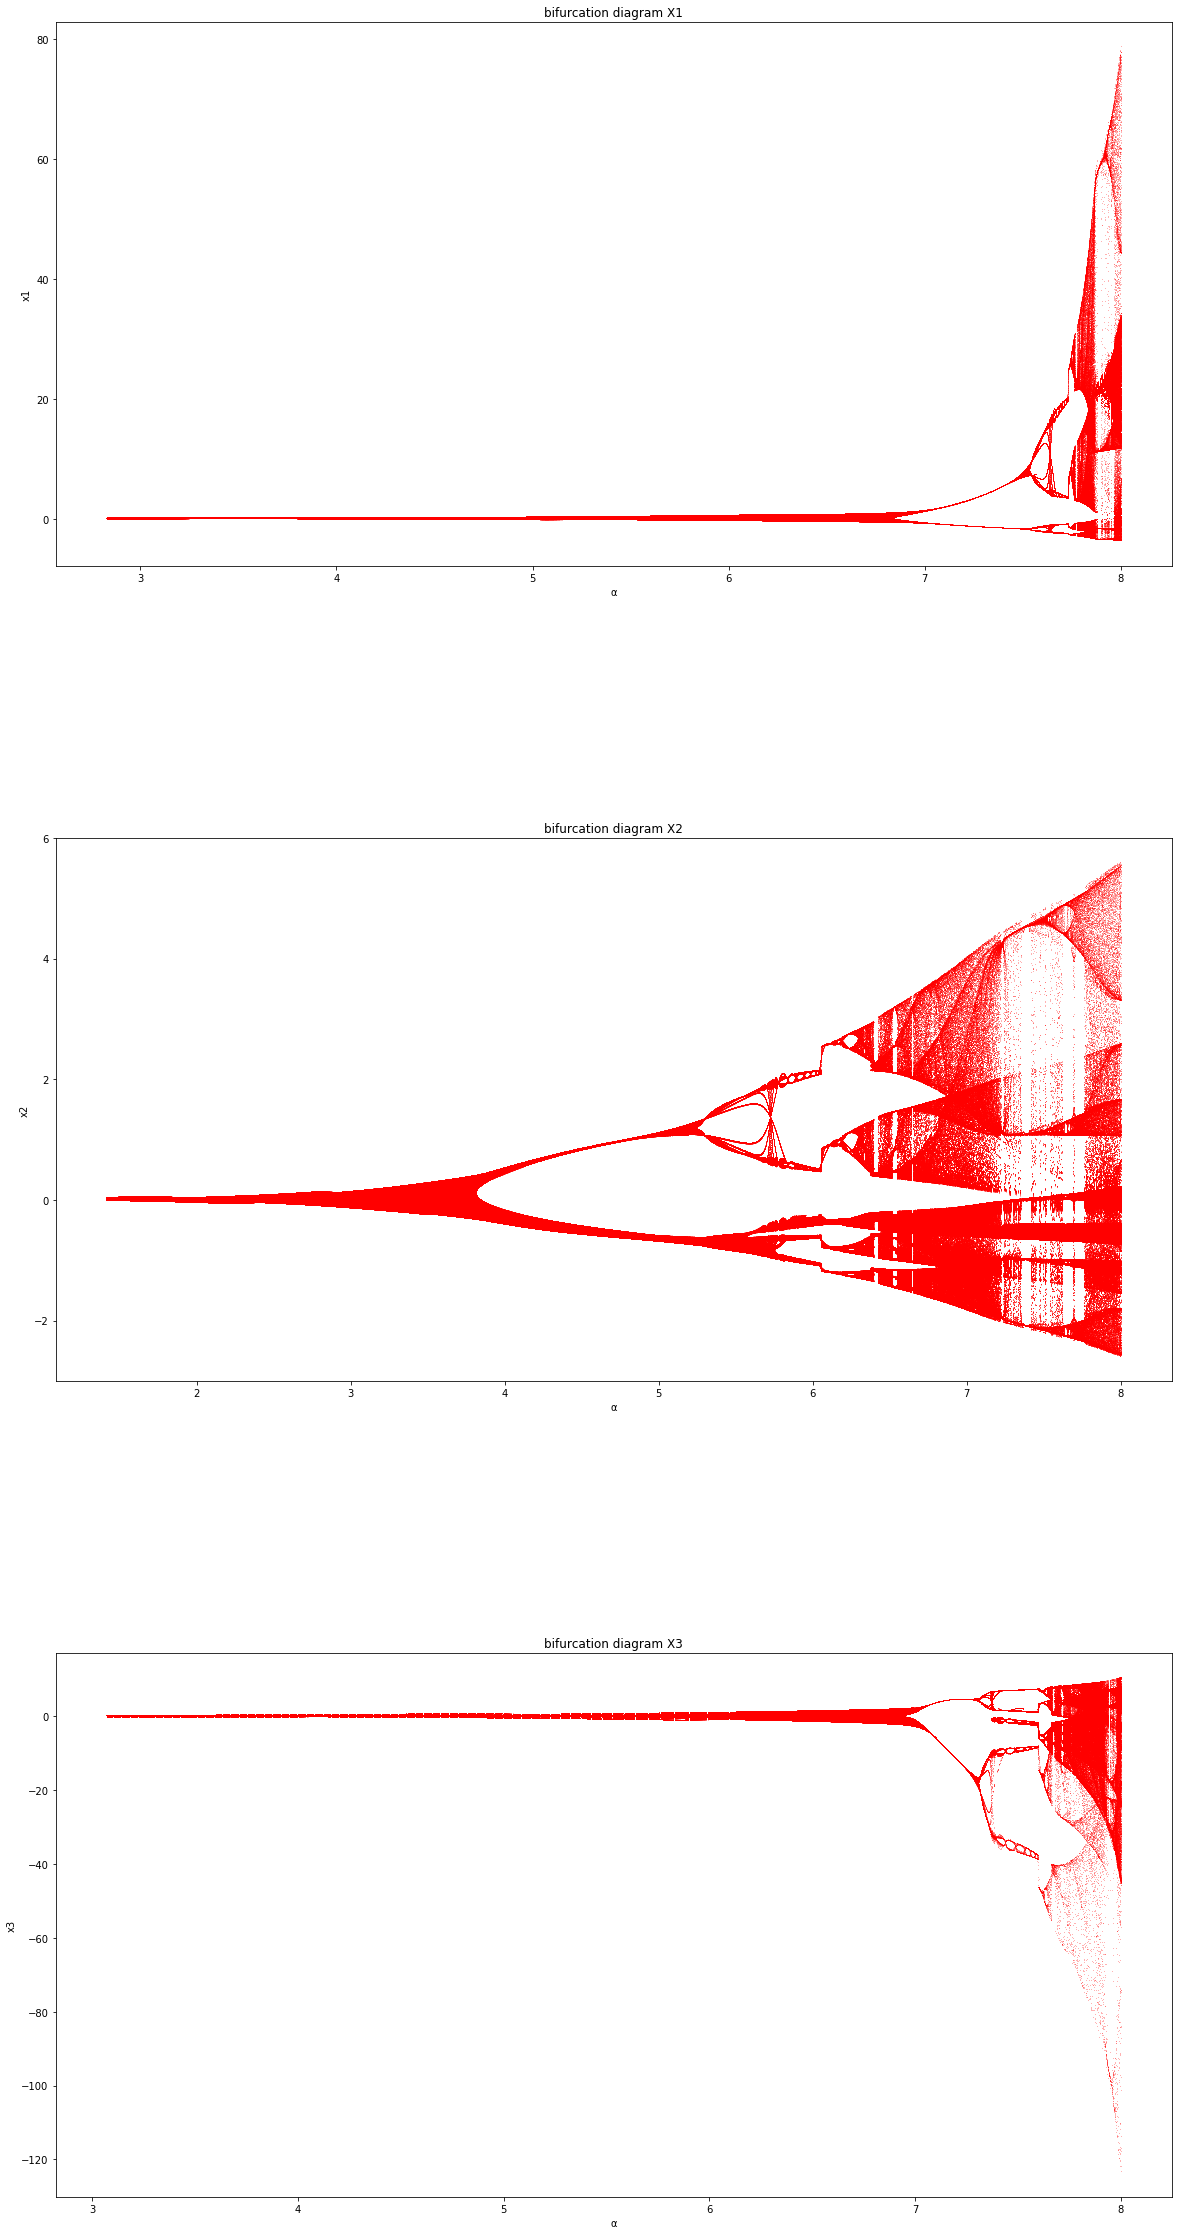

In [143]:
#%matplotlib notebook

xticks= np.linspace(αmin, αmax, len(mapsx1))
plt.subplots(figsize=(20,40))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.subplot(3,1,1)
plt.title("bifurcation diagram X1")
plt.xlabel("α")
plt.ylabel("x1")
plt.plot(xticks[5000000:-1], mapsx1[5000000:-1], 'r,',alpha = 0.3, label = 'Map')#'r,'


plt.subplot(3,1,2)
xticks= np.linspace(αmin, αmax, len(mapsx2))

plt.plot(xticks[5000000:-1], mapsx2[5000000:-1], 'r,',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X2")

plt.xlabel("α")
plt.ylabel("x2")

xticks= np.linspace(αmin, αmax, len(mapsx3))

plt.subplot(3,1,3)
plt.plot(xticks[5000000:-1], mapsx3[5000000:-1], 'r,',alpha = 0.3, label = 'Map')
plt.title("bifurcation diagram X3")

plt.xlabel("α")

plt.ylabel("x3")
plt.show()

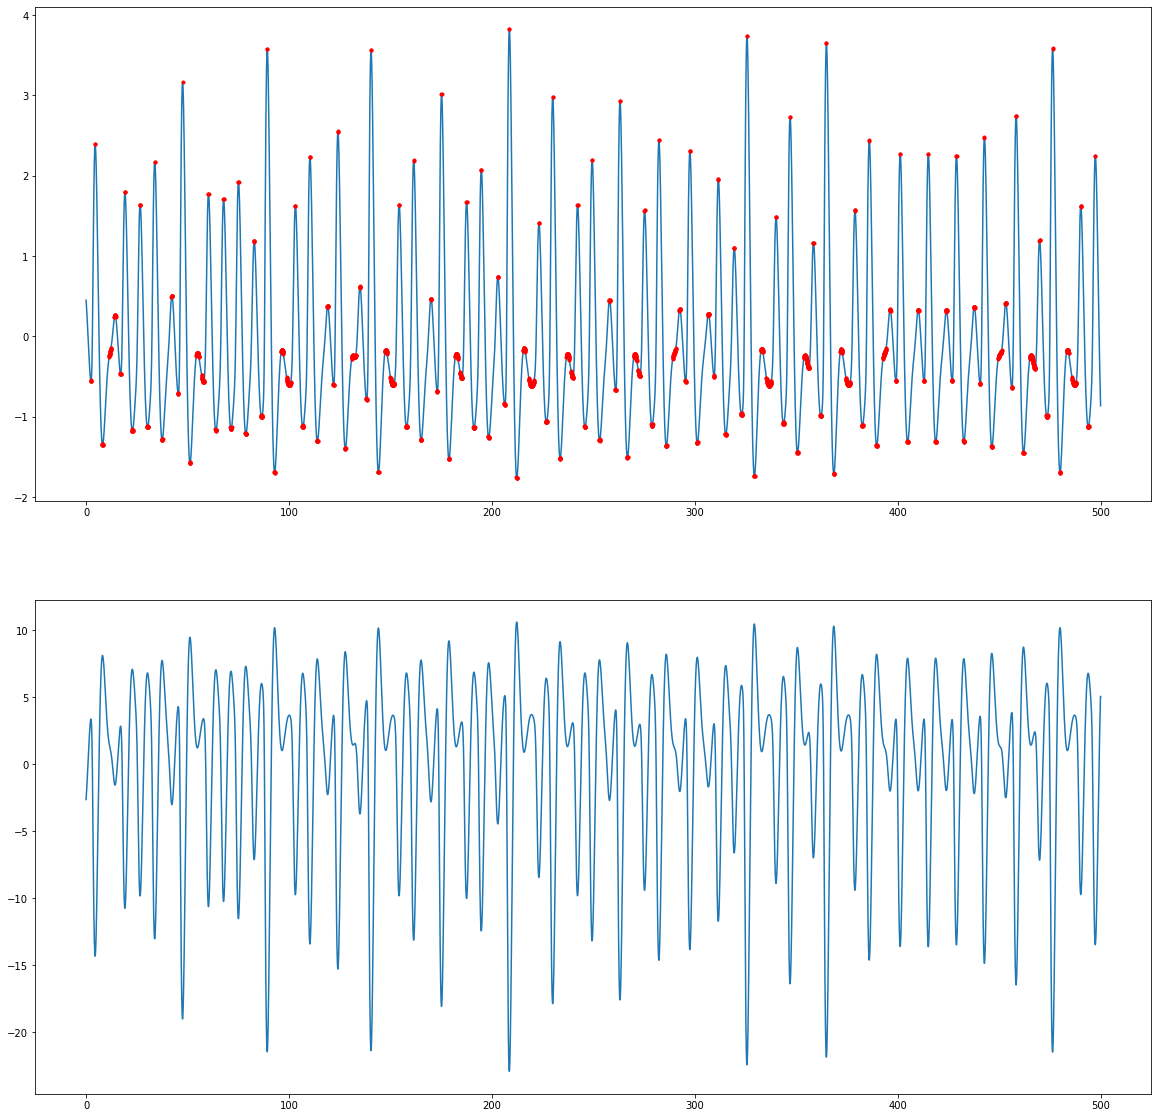

In [57]:
# trouve les extremums locals dérivée nulle 
x,y=find_slope_eq0(X2,temps)
plt.subplots(figsize=(20,20))

plt.subplot(211)
plt.plot(temps,X2,x,y,'r.')
plt.subplot(212)
plt.plot(temps,a)
plt.show()

(array([ 5726., 14234., 38720., 19077.,  8095.,  5503.,  2621.,  2957.,
         1841.,  1226.]),
 array([-0.09837628, -0.0677143 , -0.03705233, -0.00639036,  0.02427162,
         0.05493359,  0.08559556,  0.11625754,  0.14691951,  0.17758148,
         0.20824346]),
 <a list of 10 Patch objects>)

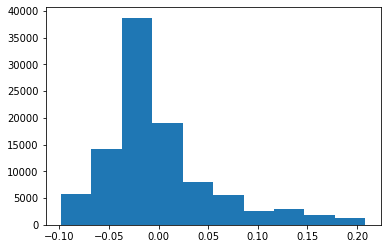

In [85]:
plt.hist(a)

In [92]:
np.count_nonzero([i<10**-10 for i in a])

65910